In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from scipy import stats
from sklearn.svm import SVR

pd.set_option('display.max_columns', 500)

In [57]:
df = pd.read_csv("D:/Data Scraping/Final Data/Selangor/Mapped/Analytical Dataset/updated/Final/com_sale_poi.csv")
df

,PLACE_NAME,AREA,TENURE,TYPE,MEDIAN PSF,MEDIAN PRICE,FILED TRANSACTIONS,LAT,LNG,DISTRICT,CITY,STATE,POSTCODE,POP_MEN,POP_WOMEN,POP_WOMEN_RE,POP_ELDERLY,POP_CHILD,POP_YOUTH,TELEKOM,7 ELEVEN,99 SPEEDMART,SURAU,TNB,KK SUPER MART,KFC,GUARDIAN,MAYBANK,COSWAY,SECRET RECIPE,PETRONAS,WATSON,SHELL,SPORTS TOTO,MONDAY_TELEKOM,MONDAY_7 ELEVEN,MONDAY_99 SPEEDMART,MONDAY_SURAU,MONDAY_TNB,MONDAY_KK SUPER MART,MONDAY_KFC,MONDAY_GUARDIAN,MONDAY_MAYBANK,MONDAY_COSWAY,MONDAY_SECRET RECIPE,MONDAY_PETRONAS,MONDAY_WATSON,MONDAY_SHELL,MONDAY_SPORTS TOTO,TUES-THURS_TELEKOM,TUES-THURS_7 ELEVEN,TUES-THURS_99 SPEEDMART,TUES-THURS_SURAU,TUES-THURS_TNB,TUES-THURS_KK SUPER MART,TUES-THURS_KFC,TUES-THURS_GUARDIAN,TUES-THURS_MAYBANK,TUES-THURS_COSWAY,TUES-THURS_SECRET RECIPE,TUES-THURS_PETRONAS,TUES-THURS_WATSON,TUES-THURS_SHELL,TUES-THURS_SPORTS TOTO,FRIDAY_TELEKOM,FRIDAY_7 ELEVEN,FRIDAY_99 SPEEDMART,FRIDAY_SURAU,FRIDAY_TNB,FRIDAY_KK SUPER MART,FRIDAY_KFC,FRIDAY_GUARDIAN,FRIDAY_MAYBANK,FRIDAY_COSWAY,FRIDAY_SECRET RECIPE,FRIDAY_PETRONAS,FRIDAY_WATSON,FRIDAY_SHELL,FRIDAY_SPORTS TOTO,SATURDAY_TELEKOM,SATURDAY_7 ELEVEN,SATURDAY_99 SPEEDMART,SATURDAY_SURAU,SATURDAY_TNB,SATURDAY_KK SUPER MART,SATURDAY_KFC,SATURDAY_GUARDIAN,SATURDAY_MAYBANK,SATURDAY_COSWAY,SATURDAY_SECRET RECIPE,SATURDAY_PETRONAS,SATURDAY_WATSON,SATURDAY_SHELL,SATURDAY_SPORTS TOTO,SUNDAY_TELEKOM,SUNDAY_7 ELEVEN,SUNDAY_99 SPEEDMART,SUNDAY_SURAU,SUNDAY_TNB,SUNDAY_KK SUPER MART,SUNDAY_KFC,SUNDAY_GUARDIAN,SUNDAY_MAYBANK,SUNDAY_COSWAY,SUNDAY_SECRET RECIPE,SUNDAY_PETRONAS,SUNDAY_WATSON,SUNDAY_SHELL,SUNDAY_SPORTS TOTO,WEEKDAY_TELEKOM,WEEKDAY_7 ELEVEN,WEEKDAY_99 SPEEDMART,WEEKDAY_SURAU,WEEKDAY_TNB,WEEKDAY_KK SUPER MART,WEEKDAY_KFC,WEEKDAY_GUARDIAN,WEEKDAY_MAYBANK,WEEKDAY_COSWAY,WEEKDAY_SECRET RECIPE,WEEKDAY_PETRONAS,WEEKDAY_WATSON,WEEKDAY_SHELL,WEEKDAY_SPORTS TOTO,WEEKEND_TELEKOM,WEEKEND_7 ELEVEN,WEEKEND_99 SPEEDMART,WEEKEND_SURAU,WEEKEND_TNB,WEEKEND_KK SUPER MART,WEEKEND_KFC,WEEKEND_GUARDIAN,WEEKEND_MAYBANK,WEEKEND_COSWAY,WEEKEND_SECRET RECIPE,WEEKEND_PETRONAS,WEEKEND_WATSON,WEEKEND_SHELL,WEEKEND_SPORTS TOTO
0,TAMAN PANDAN INDAH,AMPANG,LEASEHOLD,"OFFICE, SHOP UNIT",216,224000,24,3.133358,101.764910,Hulu Langat District,Kuala Lumpur,Selangor,55100,7054.354179,6660.623430,4291.721658,749.460771,914.928120,2751.665472,1,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0.0,0.0,5.50,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.142857,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,6.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,5.913043,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,6.375,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.000
1,SEKSYEN 21-28 BANDAR KLANG,KLANG,FREEHOLD,SHOPLOT,213,1000000,22,3.041072,101.450951,Klang,Klang,Selangor,41000,864.995363,770.630471,451.864353,185.027820,73.707524,294.020156,15,2,2,0,0,0,0,0,0,1,0,0,0,0,2,0.0,0.0,2.50,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,3.714286,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,3.130435,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,1.500,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.000
2,BANDAR PUTERI PUCHONG,PUCHONG,FREEHOLD,SHOPLOT,506,1940000,22,3.017526,101.624703,Petaling District,Puchong,Selangor,47100,2712.728920,2441.786160,1572.122450,215.336305,450.473765,977.607485,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.

In [58]:
cols_pop = df.columns[df.columns.str.contains('POP')]
cols_pop

Index(['POP_MEN', 'POP_WOMEN', 'POP_WOMEN_RE', 'POP_ELDERLY', 'POP_CHILD',
       'POP_YOUTH'],
      dtype='object')

In [59]:
for i in cols_pop:
    df = df[df[i] != 0.0]

In [60]:
for i in cols_pop:
    df[i] = df[i].astype(int)

In [61]:
df_ = df.drop(columns=['PLACE_NAME', 'AREA', 'LAT', 'LNG', 'DISTRICT', 'CITY', 'STATE', 'POSTCODE', 'MEDIAN PSF', 'MEDIAN PRICE'])

In [62]:
df_

,TENURE,TYPE,FILED TRANSACTIONS,POP_MEN,POP_WOMEN,POP_WOMEN_RE,POP_ELDERLY,POP_CHILD,POP_YOUTH,TELEKOM,7 ELEVEN,99 SPEEDMART,SURAU,TNB,KK SUPER MART,KFC,GUARDIAN,MAYBANK,COSWAY,SECRET RECIPE,PETRONAS,WATSON,SHELL,SPORTS TOTO,MONDAY_TELEKOM,MONDAY_7 ELEVEN,MONDAY_99 SPEEDMART,MONDAY_SURAU,MONDAY_TNB,MONDAY_KK SUPER MART,MONDAY_KFC,MONDAY_GUARDIAN,MONDAY_MAYBANK,MONDAY_COSWAY,MONDAY_SECRET RECIPE,MONDAY_PETRONAS,MONDAY_WATSON,MONDAY_SHELL,MONDAY_SPORTS TOTO,TUES-THURS_TELEKOM,TUES-THURS_7 ELEVEN,TUES-THURS_99 SPEEDMART,TUES-THURS_SURAU,TUES-THURS_TNB,TUES-THURS_KK SUPER MART,TUES-THURS_KFC,TUES-THURS_GUARDIAN,TUES-THURS_MAYBANK,TUES-THURS_COSWAY,TUES-THURS_SECRET RECIPE,TUES-THURS_PETRONAS,TUES-THURS_WATSON,TUES-THURS_SHELL,TUES-THURS_SPORTS TOTO,FRIDAY_TELEKOM,FRIDAY_7 ELEVEN,FRIDAY_99 SPEEDMART,FRIDAY_SURAU,FRIDAY_TNB,FRIDAY_KK SUPER MART,FRIDAY_KFC,FRIDAY_GUARDIAN,FRIDAY_MAYBANK,FRIDAY_COSWAY,FRIDAY_SECRET RECIPE,FRIDAY_PETRONAS,FRIDAY_WATSON,FRIDAY_SHELL,FRIDAY_SPORTS TOTO,SATURDAY_TELEKOM,SATURDAY_7 ELEVEN,SATURDAY_99 SPEEDMART,SATURDAY_SURAU,SATURDAY_TNB,SATURDAY_KK SUPER MART,SATURDAY_KFC,SATURDAY_GUARDIAN,SATURDAY_MAYBANK,SATURDAY_COSWAY,SATURDAY_SECRET RECIPE,SATURDAY_PETRONAS,SATURDAY_WATSON,SATURDAY_SHELL,SATURDAY_SPORTS TOTO,SUNDAY_TELEKOM,SUNDAY_7 ELEVEN,SUNDAY_99 SPEEDMART,SUNDAY_SURAU,SUNDAY_TNB,SUNDAY_KK SUPER MART,SUNDAY_KFC,SUNDAY_GUARDIAN,SUNDAY_MAYBANK,SUNDAY_COSWAY,SUNDAY_SECRET RECIPE,SUNDAY_PETRONAS,SUNDAY_WATSON,SUNDAY_SHELL,SUNDAY_SPORTS TOTO,WEEKDAY_TELEKOM,WEEKDAY_7 ELEVEN,WEEKDAY_99 SPEEDMART,WEEKDAY_SURAU,WEEKDAY_TNB,WEEKDAY_KK SUPER MART,WEEKDAY_KFC,WEEKDAY_GUARDIAN,WEEKDAY_MAYBANK,WEEKDAY_COSWAY,WEEKDAY_SECRET RECIPE,WEEKDAY_PETRONAS,WEEKDAY_WATSON,WEEKDAY_SHELL,WEEKDAY_SPORTS TOTO,WEEKEND_TELEKOM,WEEKEND_7 ELEVEN,WEEKEND_99 SPEEDMART,WEEKEND_SURAU,WEEKEND_TNB,WEEKEND_KK SUPER MART,WEEKEND_KFC,WEEKEND_GUARDIAN,WEEKEND_MAYBANK,WEEKEND_COSWAY,WEEKEND_SECRET RECIPE,WEEKEND_PETRONAS,WEEKEND_WATSON,WEEKEND_SHELL,WEEKEND_SPORTS TOTO
0,LEASEHOLD,"OFFICE, SHOP UNIT",24,7054,6660,4291,749,914,2751,1,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0.0,0.0,5.50,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.142857,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,6.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,5.913043,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,6.375,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.000
1,FREEHOLD,SHOPLOT,22,864,770,451,185,73,294,15,2,2,0,0,0,0,0,0,1,0,0,0,0,2,0.0,0.0,2.50,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,3.714286,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,3.130435,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,1.500,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.000
2,FREEHOLD,SHOPLOT,22,2712,2441,1572,215,450,977,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.000
3,FREEHOLD,"OFFICE, SHOP UNIT",17,2779,2563,1575,285,408,1037,0,0,1,1,0,1,1,1,0,0,0,0,1,0,0,0.0,0.0,0.00,0.00,0.0,0.0,2.25,0.0,0.0,0.0,0.0,0.0,2.75,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,3.071429,0.0,0.0,0.0,0.0,0.0,3.00

## MEDIAN PSF

In [63]:
## one hot encoding, normalization

X = df_
X = pd.get_dummies(X)

y = np.log1p(df["MEDIAN PSF"])
# x = df[["MEDIAN PSF"]] #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# y = pd.DataFrame(x_scaled)

In [64]:
cols_pop = X.columns[X.columns.str.contains('POP')]
cols_pop

Index(['POP_MEN', 'POP_WOMEN', 'POP_WOMEN_RE', 'POP_ELDERLY', 'POP_CHILD',
       'POP_YOUTH'],
      dtype='object')

In [65]:
## boxcox
X['FILED TRANSACTIONS'] = stats.boxcox(X['FILED TRANSACTIONS'])[0]
for i in cols_pop:
    X[i] = stats.boxcox(X[i])[0]
    
X

,FILED TRANSACTIONS,POP_MEN,POP_WOMEN,POP_WOMEN_RE,POP_ELDERLY,POP_CHILD,POP_YOUTH,TELEKOM,7 ELEVEN,99 SPEEDMART,SURAU,TNB,KK SUPER MART,KFC,GUARDIAN,MAYBANK,COSWAY,SECRET RECIPE,PETRONAS,WATSON,SHELL,SPORTS TOTO,MONDAY_TELEKOM,MONDAY_7 ELEVEN,MONDAY_99 SPEEDMART,MONDAY_SURAU,MONDAY_TNB,MONDAY_KK SUPER MART,MONDAY_KFC,MONDAY_GUARDIAN,MONDAY_MAYBANK,MONDAY_COSWAY,MONDAY_SECRET RECIPE,MONDAY_PETRONAS,MONDAY_WATSON,MONDAY_SHELL,MONDAY_SPORTS TOTO,TUES-THURS_TELEKOM,TUES-THURS_7 ELEVEN,TUES-THURS_99 SPEEDMART,TUES-THURS_SURAU,TUES-THURS_TNB,TUES-THURS_KK SUPER MART,TUES-THURS_KFC,TUES-THURS_GUARDIAN,TUES-THURS_MAYBANK,TUES-THURS_COSWAY,TUES-THURS_SECRET RECIPE,TUES-THURS_PETRONAS,TUES-THURS_WATSON,TUES-THURS_SHELL,TUES-THURS_SPORTS TOTO,FRIDAY_TELEKOM,FRIDAY_7 ELEVEN,FRIDAY_99 SPEEDMART,FRIDAY_SURAU,FRIDAY_TNB,FRIDAY_KK SUPER MART,FRIDAY_KFC,FRIDAY_GUARDIAN,FRIDAY_MAYBANK,FRIDAY_COSWAY,FRIDAY_SECRET RECIPE,FRIDAY_PETRONAS,FRIDAY_WATSON,FRIDAY_SHELL,FRIDAY_SPORTS TOTO,SATURDAY_TELEKOM,SATURDAY_7 ELEVEN,SATURDAY_99 SPEEDMART,SATURDAY_SURAU,SATURDAY_TNB,SATURDAY_KK SUPER MART,SATURDAY_KFC,SATURDAY_GUARDIAN,SATURDAY_MAYBANK,SATURDAY_COSWAY,SATURDAY_SECRET RECIPE,SATURDAY_PETRONAS,SATURDAY_WATSON,SATURDAY_SHELL,SATURDAY_SPORTS TOTO,SUNDAY_TELEKOM,SUNDAY_7 ELEVEN,SUNDAY_99 SPEEDMART,SUNDAY_SURAU,SUNDAY_TNB,SUNDAY_KK SUPER MART,SUNDAY_KFC,SUNDAY_GUARDIAN,SUNDAY_MAYBANK,SUNDAY_COSWAY,SUNDAY_SECRET RECIPE,SUNDAY_PETRONAS,SUNDAY_WATSON,SUNDAY_SHELL,SUNDAY_SPORTS TOTO,WEEKDAY_TELEKOM,WEEKDAY_7 ELEVEN,WEEKDAY_99 SPEEDMART,WEEKDAY_SURAU,WEEKDAY_TNB,WEEKDAY_KK SUPER MART,WEEKDAY_KFC,WEEKDAY_GUARDIAN,WEEKDAY_MAYBANK,WEEKDAY_COSWAY,WEEKDAY_SECRET RECIPE,WEEKDAY_PETRONAS,WEEKDAY_WATSON,WEEKDAY_SHELL,WEEKDAY_SPORTS TOTO,WEEKEND_TELEKOM,WEEKEND_7 ELEVEN,WEEKEND_99 SPEEDMART,WEEKEND_SURAU,WEEKEND_TNB,WEEKEND_KK SUPER MART,WEEKEND_KFC,WEEKEND_GUARDIAN,WEEKEND_MAYBANK,WEEKEND_COSWAY,WEEKEND_SECRET RECIPE,WEEKEND_PETRONAS,WEEKEND_WATSON,WEEKEND_SHELL,WEEKEND_SPORTS TOTO,TENURE_FREEHOLD,"TENURE_FREEHOLD, LEASEHOLD",TENURE_LEASEHOLD,TYPE_OFFICE,"TYPE_OFFICE, SHOP UNIT",TYPE_OTHERS,TYPE_RETAIL UNIT,TYPE_SHOP UNIT,TYPE_SHOPLOT
0,0.981092,85.711443,84.376812,69.432588,28.853327,47.763422,68.413321,1,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0.0,0.0,5.50,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.142857,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,6.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,5.913043,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,6.375,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.000,0,0,1,0,1,0,0,0,0
1,0.976969,35.361580,33.839665,26.570060,16.058653,13.455252,24.622231,15,2,2,0,0,0,0,0,0,1,0,0,0,0,2,0.0,0.0,2.50,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,3.714286,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,3.130435,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,1.500,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.000,1,0,0,0,0,0,0,0,1
2,0.976969,57.519194,55.414492,45.530976,17.136711,33.883017,42.923219,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.000,0.0,0

Boruta

In [66]:
## function to rank features
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [68]:
rf = RandomForestRegressor()
boruta_col = X.columns
feat_selector = BorutaPy(rf, n_estimators = "auto", random_state = 1)

feat_selector.fit(X.values, y.values.ravel())
colnames = X.columns
boruta_score = ranking(list(map(float, feat_selector.ranking_)), boruta_col, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features','Score'])
boruta_score = boruta_score.sort_values('Score', ascending = False)

In [69]:
print('---------Top 15----------')
display(boruta_score.head(15))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 15----------


,Features,Score
6,POP_YOUTH,1.00
4,POP_ELDERLY,0.99
3,POP_WOMEN_RE,0.98
8,7 ELEVEN,0.98
5,POP_CHILD,0.97
1,POP_MEN,0.96
2,POP_WOMEN,0.95
133,TYPE_RETAIL UNIT,0.95
7,TELEKOM,0.94
0,FILED TRANSACTIONS,0.93


---------Bottom 10----------


,Features,Score
56,FRIDAY_TNB,0.0
116,WEEKEND_TNB,0.0
67,SATURDAY_TELEKOM,0.0
52,FRIDAY_TELEKOM,0.0
101,WEEKDAY_TNB,0.0
41,TUES-THURS_TNB,0.0
71,SATURDAY_TNB,0.0
86,SUNDAY_TNB,0.0
26,MONDAY_TNB,0.0
22,MONDAY_TELEKOM,0.0


Text(0.5, 1.0, 'Boruta Top 30 Features')

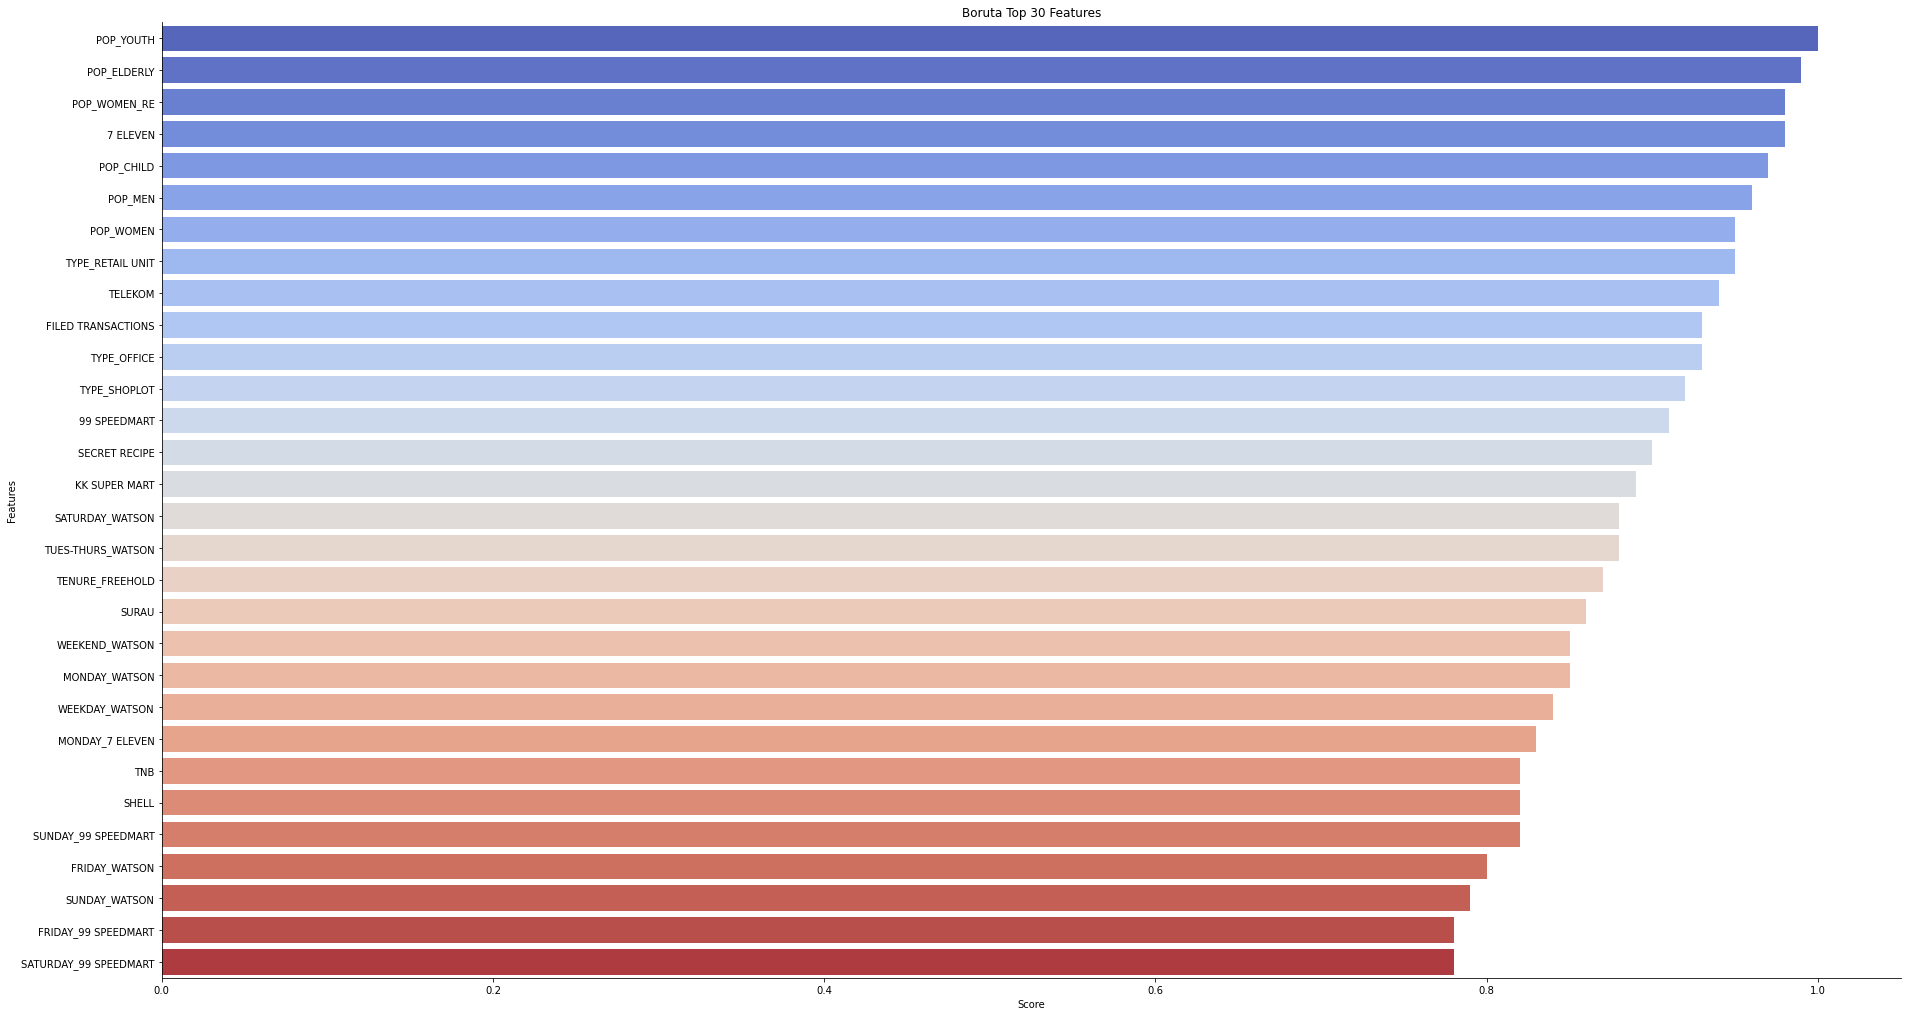

In [70]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:30], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 30 Features")

Compare number of features taken to model score

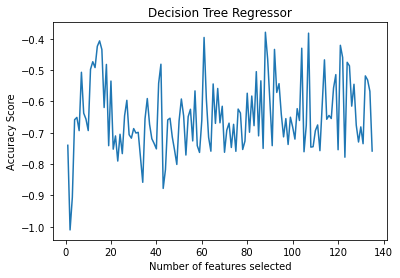

In [72]:
accuracies_iteration = defaultdict(list)
for i in range(1,boruta_score.shape[0]):
    colnames = boruta_score.head(i)['Features'].tolist()
    X_ = X[colnames]
    X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.3, random_state=10)
    cart = DecisionTreeRegressor()
    cart.fit(X_train,y_train)
    y_pred=cart.predict(X_test)
    accuracies_iteration[i].append(metrics.r2_score(y_test, y_pred))

result = pd.DataFrame.from_dict(accuracies_iteration)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy Score")
plt.plot(result.columns, result.values.ravel())
plt.title("Decision Tree Regressor")
plt.show()

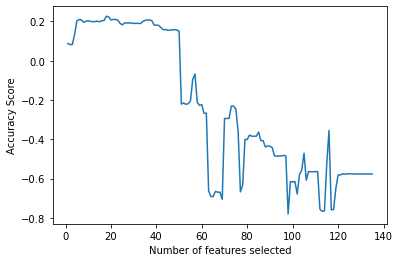

In [74]:
accuracies_iteration = defaultdict(list)
for i in range(1,boruta_score.shape[0]):
    colnames = boruta_score.head(i)['Features'].tolist()
    X_ = X[colnames]
    X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.3, random_state=10)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracies_iteration[i].append(metrics.r2_score(y_test, y_pred))

result = pd.DataFrame.from_dict(accuracies_iteration)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy Score")
plt.plot(result.columns, result.values.ravel())
plt.title("Linear Regression")
plt.show()

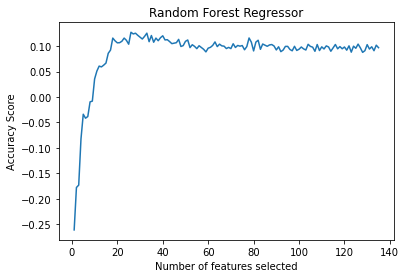

In [77]:
accuracies_iteration = defaultdict(list)
for i in range(1,boruta_score.shape[0]):
    colnames = boruta_score.head(i)['Features'].tolist()
    X_ = X[colnames]
    X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.3, random_state=10)
    rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies_iteration[i].append(metrics.r2_score(y_test, y_pred))

result = pd.DataFrame.from_dict(accuracies_iteration)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy Score")
plt.plot(result.columns, result.values.ravel())
plt.title("Random Forest Regressor")
plt.show()

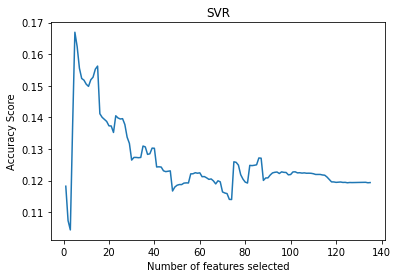

In [81]:
accuracies_iteration = defaultdict(list)
for i in range(1,boruta_score.shape[0]):
    colnames = boruta_score.head(i)['Features'].tolist()
    X_ = X[colnames]
    X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.3, random_state=10)
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    accuracies_iteration[i].append(metrics.r2_score(y_test, y_pred))

result = pd.DataFrame.from_dict(accuracies_iteration)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy Score")
plt.plot(result.columns, result.values.ravel())
plt.title("SVR")
plt.show()

In [82]:
## use top 15 features
bcols = boruta_score[:15]['Features'].tolist()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X[bcols],y,test_size=0.3, random_state=1)

# sc_x = StandardScaler()
# X_train = sc_x.fit_transform(X_train)
# X_test = sc_x.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)


## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [84]:
#lr.score(X_test, y_test)
#y_test = sc_y.fit_transform(y_test)
metrics.r2_score(y_test, y_pred)

0.01827876437305842

In [85]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.44556345388704444
0.44121134784172217
0.6642374182788275


In [86]:
## Decision Tree

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [87]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.6597047108774723
0.7496771183256281
0.8658389678950862


In [88]:
#y_test = sc_y.fit_transform(y_test)
metrics.r2_score(y_test, y_pred)

-0.6680757431195989

In [89]:
## Random Forest Regressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [90]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.48278800659241733
0.4698174966280385
0.6854323428523332


In [91]:
metrics.r2_score(y_test, y_pred)

-0.04537160153526609

In [92]:
## SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [93]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.46351273334526377
0.47132239092416284
0.6865292353018645


In [94]:
metrics.r2_score(y_test, y_pred)

-0.048720079980133946